In [ ]:
import pandas as pd

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)
confirmed_df.head()
#deaths_df.sum()

In [ ]:
deaths_df.head()
#deaths_df.sum()

In [47]:
global_covid_df = pd.DataFrame({
    'Date': confirmed_df.columns[4:],
    'ConfirmedCases': confirmed_df.iloc[:, 4:].sum(axis=0),
    'Deaths': deaths_df.iloc[:, 4:].sum(axis=0)
})

global_covid_df = global_covid_df.rename(columns={'Date': 'date'})


global_covid_df.tail()

,date,ConfirmedCases,Deaths
3/5/23,3/5/23,676024901,6877749
3/6/23,3/6/23,676082941,6878115
3/7/23,3/7/23,676213378,6879038
3/8/23,3/8/23,676392824,6880483
3/9/23,3/9/23,676570149,6881802


In [ ]:
pip install yfinance

#API_KEY = "CTIEAMvghfytfGIY"

In [ ]:
pip install alpha_vantage

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Function to fetch stock data
def fetch_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data

api_key = 'CTIEAMvghfytfGIY'

# Overall American Market
american_market_stock = fetch_stock_data('SPY', api_key)

# Overall Canadian Market
canadian_market_stock = fetch_stock_data('EWC', api_key)

# Travel Sector
travel_stock = fetch_stock_data('DAL', api_key)

# Real Estate Sector
real_estate_stock = fetch_stock_data('VNQ', api_key)

# Precious Metals
precious_metals_stock = fetch_stock_data('GOLD', api_key)

# Display the fetched data (example for Overall American Market)
print("Overall American Market Stock Data:")
#print(american_market_stock.tail())


stock_dataframes = [american_market_stock, canadian_market_stock, travel_stock, real_estate_stock, precious_metals_stock]

# Rename columns in all dataframes
for df in stock_dataframes:
    df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    }, inplace=True)
print(american_market_stock.tail())

In [83]:
#Merging Covid and Metals Dataframe
global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
precious_metals_stock.reset_index(inplace=True)
precious_metals_stock['date'] = pd.to_datetime(precious_metals_stock['date'])



merge_precious_metals_df = pd.merge(global_covid_df, precious_metals_stock, how='left', on='date')
merge_precious_metals_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,16.43,16.480,16.1800,16.30,11512817.0
1140,2023-03-07,676213378,6879038,16.10,16.150,15.6700,15.77,21944103.0
1141,2023-03-08,676392824,6880483,15.79,15.955,15.5800,15.62,16848316.0
1142,2023-03-09,676570149,6881802,15.75,15.865,15.4804,15.57,14879840.0


In [61]:
#Merging Covid and Travel Dataframe
global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
travel_stock.reset_index(inplace=True)
travel_stock['date'] = pd.to_datetime(travel_stock['date'])



merge_travel_df = pd.merge(global_covid_df, travel_stock, how='left', on='date')
merge_travel_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,38.990,39.265,38.36,38.46,5238323.0
1140,2023-03-07,676213378,6879038,38.910,39.770,38.70,39.07,11338823.0
1141,2023-03-08,676392824,6880483,39.210,39.740,39.17,39.73,7836471.0
1142,2023-03-09,676570149,6881802,39.745,40.300,38.32,38.49,9929975.0


In [48]:
#Merging Covid and Canadian Dataframe
global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
canadian_market_stock.reset_index(inplace=True)
canadian_market_stock['date'] = pd.to_datetime(canadian_market_stock['date'])



merge_canadian_df = pd.merge(global_covid_df, canadian_market_stock, how='left', on='date')
merge_canadian_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,index,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,195.0,34.75,34.83,34.5944,34.66,2277726.0
1140,2023-03-07,676213378,6879038,194.0,34.56,34.56,33.8150,33.90,2297960.0
1141,2023-03-08,676392824,6880483,193.0,33.72,34.14,33.7200,33.91,2254903.0
1142,2023-03-09,676570149,6881802,192.0,34.01,34.20,33.3400,33.38,1749143.0


In [63]:
#Merging Covid and Real Estate Dataframe
global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
real_estate_stock.reset_index(inplace=True)
real_estate_stock['date'] = pd.to_datetime(real_estate_stock['date'])



merge_real_estate_df = pd.merge(global_covid_df, real_estate_stock, how='left', on='date')
merge_real_estate_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,87.33,87.41,86.385,86.59,3893712.0
1140,2023-03-07,676213378,6879038,86.53,86.61,84.390,84.57,6540561.0
1141,2023-03-08,676392824,6880483,84.53,86.04,84.490,85.54,5750544.0
1142,2023-03-09,676570149,6881802,85.68,85.76,83.395,83.58,5974604.0


In [49]:
#Merging Covid and American Dataframe
global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
american_market_stock.reset_index(inplace=True)
american_market_stock['date'] = pd.to_datetime(american_market_stock['date'])



merge_american_df = pd.merge(global_covid_df, american_market_stock, how='left', on='date')
merge_american_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,level_0,index,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,195.0,195.0,405.05,407.45,404.010,404.47,72795946.0
1140,2023-03-07,676213378,6879038,194.0,194.0,404.42,404.67,397.625,398.27,108310596.0
1141,2023-03-08,676392824,6880483,193.0,193.0,398.39,399.71,396.590,398.92,74746632.0
1142,2023-03-09,676570149,6881802,192.0,192.0,399.74,401.48,390.530,391.56,111945322.0


# Dual Axis plots in Python

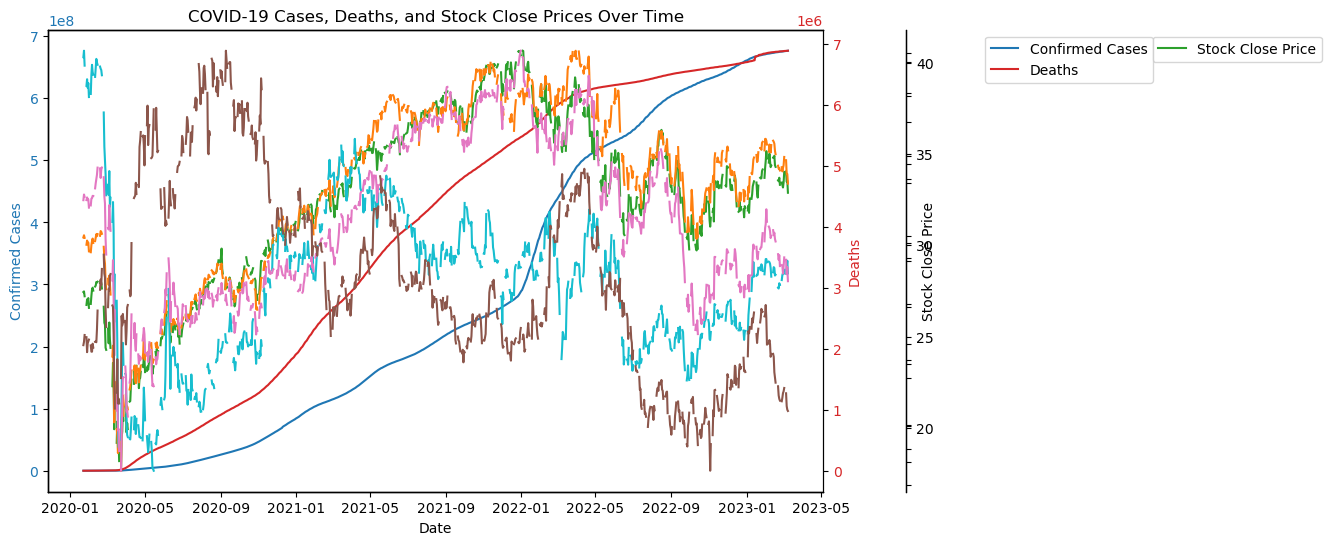

In [105]:
import matplotlib.pyplot as plt

# Plot COVID-19 data
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Confirmed Cases', color=color)
ax1.plot(global_covid_df['date'], global_covid_df['ConfirmedCases'], label='Confirmed Cases', color=color, )
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Deaths
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Deaths', color=color)  
ax2.plot(global_covid_df['date'], global_covid_df['Deaths'], label='Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Plot stock data (example for SPY)
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
ax3.set_ylabel('Stock Close Price')
ax3.plot(merge_american_df['date'], merge_american_df['Close'], label='Stock Close Price', color=color)


# Plot stock data (example for EWC)
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
#ax3.set_ylabel('Stock Close Price (SPY)', color=color)
ax4.plot(merge_canadian_df['date'], merge_canadian_df['Close'], color=color)


# Plot stock data (example for DAL)
ax5 = ax1.twinx()
color = 'tab:cyan'
ax5.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
#ax3.set_ylabel('Stock Close Price (SPY)', color=color)
ax5.plot(merge_travel_df['date'], merge_travel_df['Close'], color=color)


# Plot stock data (example for VNQ)
ax6 = ax1.twinx()
color = 'tab:pink'
ax6.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
#ax3.set_ylabel('Stock Close Price (SPY)', color=color)
ax6.plot(merge_real_estate_df['date'], merge_real_estate_df['Close'], color=color)


# Plot stock data (example for GOLD)
ax4 = ax1.twinx()
color = 'tab:brown'
ax4.spines['right'].set_position(('outward', 60))  # Adjust the position of the new axis
#ax3.set_ylabel('Stock Close Price (SPY)', color=color)
ax4.plot(merge_precious_metals_df['date'], merge_precious_metals_df['Close'], color=color)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
# lines4, labels4 = ax4.get_legend_handles_labels()
# lines5, labels5 = ax5.get_legend_handles_labels()
# lines6, labels6 = ax6.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.2, 1))
ax3.legend(lines3, labels3, loc='upper right', bbox_to_anchor=(1.652, 1))
# ax4.legend(lines4, labels4, loc='upper right', bbox_to_anchor=(1.652, 1))
# ax5.legend(lines5, labels5, loc='upper right')
# ax6.legend(lines6, labels6, loc='upper right')

ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])
ax6.set_yticklabels([])

plt.title('COVID-19 Cases, Deaths, and Stock Close Prices Over Time')
plt.show()
